In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Partie 1

In [2]:
credit = pd.read_csv('./credit_scoring.csv', sep=";", header = 0)
credit.head(3)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0


In [3]:
credit.shape

(4375, 14)

In [4]:
X = credit.iloc[:, :13].values
Y = credit.iloc[:, 13].values

In [5]:
MP = 100*np.sum(Y==0)/len(Y)
BP = 100*np.sum(Y==1)/len(Y)

print("MP : " + str(MP) + "/ BP : " + str(BP))

MP : 27.794285714285714/ BP : 72.20571428571428


## Apprentissage

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.5, random_state = 1)

In [8]:
def classifier(XTrain, XTest, YTrain, YTest):
    DT = DecisionTreeClassifier(criterion='gini', random_state = 1)
    DT.fit(XTrain, YTrain)
    YDT = DT.predict(XTest)
    
    print("Decision Tree :")
    print(confusion_matrix(YTest, YDT))
    print("Accuracy : " + str(np.round(100 * accuracy_score(YTest, YDT), 2)) + "% / Precision : " + str(np.round(100 * precision_score(YTest, YDT), 2)) + "%")
    
    KNN = KNeighborsClassifier(n_neighbors = 5)
    KNN.fit(XTrain, YTrain)
    YKNN = KNN.predict(XTest)
    
    print("KNN :")
    print(confusion_matrix(YTest, YKNN))
    print("Accuracy : " + str(np.round(100 * accuracy_score(YTest, YKNN),2)) + "% / Precision : " + str(np.round(100 * precision_score(YTest, YKNN), 2)) + "%")
    
    MLP = MLPClassifier(random_state = 1, hidden_layer_sizes=(40, 20))
    MLP.fit(XTrain, YTrain)
    YMLP = MLP.predict(XTest)
    
    print("MLP :")
    print(confusion_matrix(YTest, YMLP))
    print("Accuracy : " + str(np.round(100 * accuracy_score(YTest, YMLP), 2)) + "% / Precision : " + str(np.round(100 * precision_score(YTest, YMLP), 2)) + "%")

In [9]:
classifier(XTrain, XTest, YTrain, YTest)

Decision Tree :
[[ 325  279]
 [ 318 1266]]
Accuracy : 72.71% / Precision : 81.94%
KNN :
[[ 189  415]
 [ 187 1397]]
Accuracy : 72.49% / Precision : 77.1%
MLP :
[[ 167  437]
 [ 222 1362]]
Accuracy : 69.88% / Precision : 75.71%


## Normalisation des données

In [10]:
scaler = StandardScaler()
scaler.fit(XTrain)
XTrainNorm = scaler.transform(XTrain)
XTestNorm = scaler.transform(XTest)
classifier(XTrainNorm, XTestNorm, YTrain, YTest)

Decision Tree :
[[ 322  282]
 [ 315 1269]]
Accuracy : 72.71% / Precision : 81.82%
KNN :
[[ 286  318]
 [ 223 1361]]
Accuracy : 75.27% / Precision : 81.06%
MLP :
[[ 342  262]
 [ 227 1357]]
Accuracy : 77.65% / Precision : 83.82%


In [11]:
scaler = MinMaxScaler()
scaler.fit(XTrain)
XTrainNormMinMax = scaler.transform(XTrain)
XTestNormMinMax = scaler.transform(XTest)
classifier(XTrainNormMinMax, XTestNormMinMax, YTrain, YTest)

Decision Tree :
[[ 325  279]
 [ 315 1269]]
Accuracy : 72.85% / Precision : 81.98%
KNN :
[[ 283  321]
 [ 236 1348]]
Accuracy : 74.54% / Precision : 80.77%
MLP :
[[ 321  283]
 [ 179 1405]]
Accuracy : 78.88% / Precision : 83.23%


## ACP

In [12]:
pca = PCA(n_components = 3)
pca.fit(XTrainNorm)
XTrainPCA = pca.transform(XTrainNorm)
XTrainPCA = np.concatenate((XTrainNorm, XTrainPCA), axis = 1)
XTestPCA = pca.transform(XTestNorm)
XTestPCA = np.concatenate((XTestNorm, XTestPCA), axis = 1)
classifier(XTrainPCA, XTestPCA, YTrain, YTest)


Decision Tree :
[[ 351  253]
 [ 324 1260]]
Accuracy : 73.63% / Precision : 83.28%
KNN :
[[ 283  321]
 [ 212 1372]]
Accuracy : 75.64% / Precision : 81.04%
MLP :
[[ 318  286]
 [ 217 1367]]
Accuracy : 77.01% / Precision : 82.7%


In [13]:
XTrainPCA.shape

(2187, 16)

## Séléction de variables

### Sans variable PCA

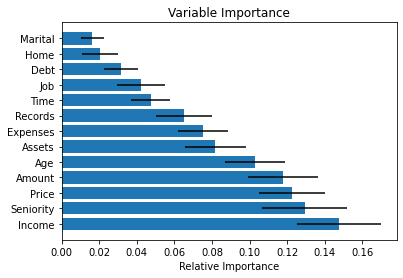

In [14]:
features = credit.columns[:13]

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500)
clf.fit(XTrainNorm, YTrain)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
padding = np.arange(XTrainNorm.size/len(XTrainNorm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

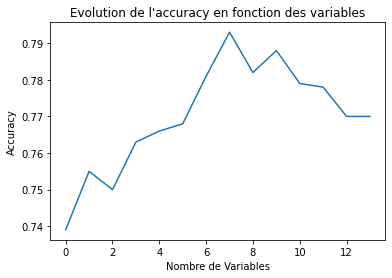

In [15]:
MLP = MLPClassifier(random_state = 1, hidden_layer_sizes=(40, 20))
scores=np.zeros(XTrainNorm.shape[1]+1)
for f in np.arange(0, XTrainNorm.shape[1]+1):
 X1_f = XTrainNorm[:,sorted_idx[:f+1]]
 X2_f = XTestNorm[:,sorted_idx[:f+1]]
 MLP.fit(X1_f,YTrain)
 YMLP=MLP.predict(X2_f)
 scores[f]=np.round(accuracy_score(YTest,YMLP),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

### Avec variables PCA

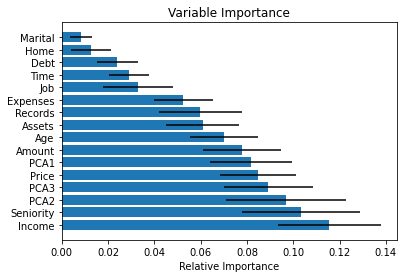

In [16]:
features = np.concatenate((credit.columns[:13], ["PCA1", "PCA2", "PCA3"]), axis = 0)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500)
clf.fit(XTrainPCA, YTrain)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx2 = np.argsort(importances)[::-1]
padding = np.arange(XTrainPCA.size/len(XTrainPCA)) + 0.5
plt.barh(padding, importances[sorted_idx2],xerr=std[sorted_idx2], align='center')
plt.yticks(padding, features[sorted_idx2])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

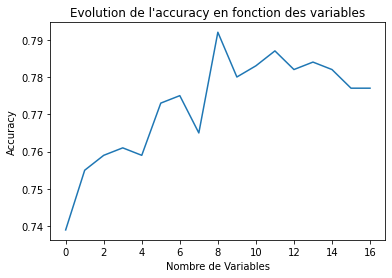

In [17]:
MLP = MLPClassifier(random_state = 1, hidden_layer_sizes=(40, 20))
scores=np.zeros(XTrainPCA.shape[1]+1)
for f in np.arange(0, XTrainPCA.shape[1]+1):
 X1_f = XTrainPCA[:,sorted_idx2[:f+1]]
 X2_f = XTestPCA[:,sorted_idx2[:f+1]]
 MLP.fit(X1_f,YTrain)
 YMLP=MLP.predict(X2_f)
 scores[f]=np.round(accuracy_score(YTest,YMLP),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

## Optimisation des paramètres

In [24]:
parameters = {'hidden_layer_sizes' : [(40,20), (20,10), (80,40), (10, 20 ,10)], 'learning_rate_init' : [0.001, 0.0005, 0.01] ,'activation' : ["logistic", "tanh", "relu"], 'random_state' : [1]}
model = MLPClassifier()

GS = GridSearchCV(model, parameters, scoring='accuracy', cv=5)
grid = GS.fit(XTrainNorm, YTrain)
print(grid.best_params_)
print(grid.best_score_)

YMLP_O = grid.predict(XTestNorm)
print("Accuracy_score d'un MLP optimisé : " + str(accuracy_score(YTest, YMLP_O)))

{'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.001, 'random_state': 1}
0.7896544517935696
Accuracy_score d'un MLP optimisé : 0.7888482632541134


In [25]:
parameters = {'hidden_layer_sizes' : [(40,20), (20,10), (80,40), (10, 20 ,10)], 'learning_rate_init' : [0.001, 0.0005, 0.01] ,'activation' : ["logistic", "tanh", "relu"], 'random_state' : [1]}
model = MLPClassifier()

GS = GridSearchCV(model, parameters, scoring='accuracy', cv=5)
grid = GS.fit(XTrainNorm[:, sorted_idx[:7]], YTrain)
print(grid.best_params_)
print(grid.best_score_)

YMLP_O = grid.predict(XTestNorm[:, sorted_idx[:7]])
print("Accuracy_score d'un MLP optimisé : " + str(accuracy_score(YTest, YMLP_O)))

{'activation': 'logistic', 'hidden_layer_sizes': (80, 40), 'learning_rate_init': 0.001, 'random_state': 1}
0.7699936261141238
Accuracy_score d'un MLP optimisé : 0.770109689213894


## Pipeline

In [27]:
from sklearn.pipeline import Pipeline
import pickle
pipe = Pipeline([('scaler', StandardScaler()), ("classifier", MLPClassifier(activation="logistic", hidden_layer_sizes=(80, 40),
                                                                            learning_rate_init = 0.001, random_state=1))])
pipe.fit(X, Y)
pickle.dump(pipe, open("pipeline.pkl", "wb"))

In [29]:
test = pd.read_csv('./test.csv', header=0, sep=';')
test.head(3)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0


In [30]:
pl = pickle.load(open("pipeline.pkl", "rb"))
pl.predict_proba(test.values)

array([[0.37866892, 0.62133108],
       [0.08952327, 0.91047673],
       [0.65078327, 0.34921673]])

## Comparaison de différents algorithme

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

import time

clfs = {
 'RF': RandomForestClassifier(n_estimators=50, random_state=1),
 'KNN': KNeighborsClassifier(n_neighbors=10),
 'ADA' : AdaBoostClassifier(n_estimators=50),
 'BAG' : BaggingClassifier(n_estimators=50),    
 'NB' : GaussianNB(),
 'MLP' : MLPClassifier(hidden_layer_sizes=(20,10), alpha=0.001, max_iter=200),
 'CART' : DecisionTreeClassifier(criterion='gini'),
 'ID3' : DecisionTreeClassifier(criterion='entropy'),
 'ST' : DecisionTreeClassifier(max_depth=1)
}


### Sans normalisation

In [223]:
def runClassifiers(X, Y, classifiers):
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    for clfName in classifiers:
        begin = time.time()
        clf = classifiers[clfName]
        cvAcc = cross_val_score(clf, X, Y, cv=kf)
        end = time.time()
        cvPrecision = cross_val_score(clf, X, Y, cv=kf, scoring='precision')
        cvAuc = cross_val_score(clf, X, Y, cv=kf, scoring='roc_auc')
        print("Accuracy for " + clfName + " is : " + str(np.round(np.mean(cvAcc),3)) + " +/- " + str(np.round(np.std(cvAcc), 3)) + " in " + str(np.round((end - begin), 3)) + " seconds.")
        print("Precision for " + clfName + " is : " + str(np.round(np.mean(cvPrecision), 3)) + " +/- " + str(np.round(np.std(cvPrecision), 3)) + " in " + str(np.round((end - begin), 3)) + " seconds.")
        print("AUC for " + clfName + " is : " + str(np.round(np.mean(cvAuc), 3)) + " +/- " + str(np.round(np.std(cvAuc), 3)) + " in " + str(np.round((end - begin), 3)) + " seconds.")
        print()

In [60]:
runClassifiers(X, Y, clfs)

Accuracy for RF is : 0.783 +/- 0.005 in 1.358 seconds.
Precision for RF is : 0.821 +/- 0.009 in 1.358 seconds.
AUC for RF is : 0.818 +/- 0.005 in 1.358 seconds.

Accuracy for KNN is : 0.764 +/- 0.007 in 0.594 seconds.
Precision for KNN is : 0.822 +/- 0.012 in 0.594 seconds.
AUC for KNN is : 0.786 +/- 0.011 in 0.594 seconds.

Accuracy for ADA is : 0.791 +/- 0.009 in 1.034 seconds.
Precision for ADA is : 0.823 +/- 0.012 in 1.034 seconds.
AUC for ADA is : 0.829 +/- 0.007 in 1.034 seconds.

Accuracy for BAG is : 0.773 +/- 0.009 in 3.392 seconds.
Precision for BAG is : 0.822 +/- 0.007 in 3.392 seconds.
AUC for BAG is : 0.816 +/- 0.009 in 3.392 seconds.

Accuracy for NB is : 0.769 +/- 0.01 in 0.015 seconds.
Precision for NB is : 0.847 +/- 0.017 in 0.015 seconds.
AUC for NB is : 0.796 +/- 0.015 in 0.015 seconds.

Accuracy for MLP is : 0.786 +/- 0.012 in 11.079 seconds.
Precision for MLP is : 0.827 +/- 0.01 in 11.079 seconds.
AUC for MLP is : 0.83 +/- 0.006 in 11.079 seconds.

Accuracy for CAR

### Avec normalisation

In [52]:
scaler = StandardScaler()
scaler.fit(X)
XNorm = scaler.transform(X)

In [49]:
runClassifiers(XNorm, Y, clfs)

[0.78057143 0.78742857 0.78171429 0.77714286 0.78971429]
Accuracy for RF is : 0.78 in 1.27 seconds.
Precision for RF is : 0.82 in 1.27 seconds.
AUC for RF is : 0.82 in 1.27 seconds.

[0.76685714 0.77371429 0.75885714 0.75314286 0.76914286]
Accuracy for KNN is : 0.76 in 0.62 seconds.
Precision for KNN is : 0.82 in 0.62 seconds.
AUC for KNN is : 0.79 in 0.62 seconds.

[0.78628571 0.80228571 0.792      0.776      0.79657143]
Accuracy for ADA is : 0.79 in 0.96 seconds.
Precision for ADA is : 0.82 in 0.96 seconds.
AUC for ADA is : 0.83 in 0.96 seconds.

[0.76571429 0.76914286 0.78285714 0.77028571 0.77828571]
Accuracy for BAG is : 0.77 in 3.26 seconds.
Precision for BAG is : 0.83 in 3.26 seconds.
AUC for BAG is : 0.81 in 3.26 seconds.

[0.74971429 0.77485714 0.77257143 0.768      0.77942857]
Accuracy for NB is : 0.77 in 0.03 seconds.
Precision for NB is : 0.85 in 0.03 seconds.
AUC for NB is : 0.8 in 0.03 seconds.

[0.77257143 0.792      0.792      0.77942857 0.816     ]
Accuracy for MLP is 

### Avec normalisation + PCA

In [53]:
pca = PCA(n_components = 3)
pca.fit(XNorm)
XPCA = pca.transform(XNorm)
XPCA = np.concatenate((XNorm, XPCA), axis = 1)

In [54]:
runClassifiers(XPCA, Y, clfs)

Accuracy for RF is : 0.79 in 2.26 seconds.
Precision for RF is : 0.82 in 2.26 seconds.
AUC for RF is : 0.83 in 2.26 seconds.

Accuracy for KNN is : 0.77 in 0.59 seconds.
Precision for KNN is : 0.82 in 0.59 seconds.
AUC for KNN is : 0.79 in 0.59 seconds.

Accuracy for ADA is : 0.79 in 1.41 seconds.
Precision for ADA is : 0.82 in 1.41 seconds.
AUC for ADA is : 0.83 in 1.41 seconds.

Accuracy for BAG is : 0.77 in 5.25 seconds.
Precision for BAG is : 0.82 in 5.25 seconds.
AUC for BAG is : 0.82 in 5.25 seconds.

Accuracy for NB is : 0.74 in 0.01 seconds.
Precision for NB is : 0.85 in 0.01 seconds.
AUC for NB is : 0.79 in 0.01 seconds.

Accuracy for MLP is : 0.79 in 11.63 seconds.
Precision for MLP is : 0.83 in 11.63 seconds.
AUC for MLP is : 0.83 in 11.63 seconds.

Accuracy for CART is : 0.73 in 0.16 seconds.
Precision for CART is : 0.81 in 0.16 seconds.
AUC for CART is : 0.66 in 0.16 seconds.

Accuracy for ID3 is : 0.72 in 0.22 seconds.
Precision for ID3 is : 0.81 in 0.22 seconds.
AUC for 

# Apprentissage supervisé : Données hétérogènes

In [70]:
credit = pd.read_csv('./credit.data', sep="\t", header=None)
credit.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,280,824,+


In [212]:
X = credit.iloc[:, :15].values
Y = credit.iloc[:, 15].values

In [213]:
XCredit = X[:, [1, 7, 10, 13, 14]]
XCredit[XCredit == '?'] = np.nan
XCredit = XCredit.astype(np.float)

In [214]:
XCredit

array([[    30.83 ,      1.25 ,      1.   ,    202.   ,      0.   ],
       [    58.67 ,      3.04 ,      6.   ,     43.   ,    560.   ],
       [    24.5  ,      1.5  ,      0.   ,    280.   ,    824.   ],
       [    27.83 ,      3.75 ,      5.   ,    100.   ,      3.   ],
       [    20.17 ,      1.71 ,      0.   ,    120.   ,      0.   ],
       [    32.08 ,      2.5  ,      0.   ,    360.   ,      0.   ],
       [    33.17 ,      6.5  ,      0.   ,    164.   ,  31285.   ],
       [    22.92 ,      0.04 ,      0.   ,     80.   ,   1349.   ],
       [    54.42 ,      3.96 ,      0.   ,    180.   ,    314.   ],
       [    42.5  ,      3.165,      0.   ,     52.   ,   1442.   ],
       [    22.08 ,      2.165,      0.   ,    128.   ,      0.   ],
       [    29.92 ,      4.335,      0.   ,    260.   ,    200.   ],
       [    38.25 ,      1.   ,      0.   ,      0.   ,      0.   ],
       [    48.08 ,      0.04 ,      0.   ,      0.   ,   2690.   ],
       [    45.83 ,      5.   ,   

In [216]:
mask = np.any(np.isnan(XCredit), axis=1)
YCredit = Y[~mask]
XCredit = XCredit[~mask]

In [217]:
XCredit.shape

(666, 5)

In [218]:
XCredit

array([[    30.83 ,      1.25 ,      1.   ,    202.   ,      0.   ],
       [    58.67 ,      3.04 ,      6.   ,     43.   ,    560.   ],
       [    24.5  ,      1.5  ,      0.   ,    280.   ,    824.   ],
       [    27.83 ,      3.75 ,      5.   ,    100.   ,      3.   ],
       [    20.17 ,      1.71 ,      0.   ,    120.   ,      0.   ],
       [    32.08 ,      2.5  ,      0.   ,    360.   ,      0.   ],
       [    33.17 ,      6.5  ,      0.   ,    164.   ,  31285.   ],
       [    22.92 ,      0.04 ,      0.   ,     80.   ,   1349.   ],
       [    54.42 ,      3.96 ,      0.   ,    180.   ,    314.   ],
       [    42.5  ,      3.165,      0.   ,     52.   ,   1442.   ],
       [    22.08 ,      2.165,      0.   ,    128.   ,      0.   ],
       [    29.92 ,      4.335,      0.   ,    260.   ,    200.   ],
       [    38.25 ,      1.   ,      0.   ,      0.   ,      0.   ],
       [    48.08 ,      0.04 ,      0.   ,      0.   ,   2690.   ],
       [    45.83 ,      5.   ,   

In [219]:
YCredit[YCredit == '+'] = 1
YCredit[YCredit == '-'] = 0
YCredit = YCredit.astype(np.float)

In [220]:
print(YCredit)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

(array([367.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 299.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

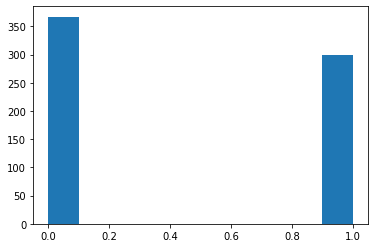

In [221]:
plt.hist(YCredit)

In [224]:
runClassifiers(XCredit, YCredit, clfs)

Accuracy for RF is : 0.785 +/- 0.044 in 0.534 seconds.
Precision for RF is : 0.79 +/- 0.037 in 0.534 seconds.
AUC for RF is : 0.854 +/- 0.029 in 0.534 seconds.

Accuracy for KNN is : 0.701 +/- 0.03 in 0.037 seconds.
Precision for KNN is : 0.758 +/- 0.046 in 0.037 seconds.
AUC for KNN is : 0.74 +/- 0.028 in 0.037 seconds.

Accuracy for ADA is : 0.779 +/- 0.018 in 0.494 seconds.
Precision for ADA is : 0.774 +/- 0.051 in 0.494 seconds.
AUC for ADA is : 0.823 +/- 0.008 in 0.494 seconds.

Accuracy for BAG is : 0.772 +/- 0.05 in 0.729 seconds.
Precision for BAG is : 0.765 +/- 0.026 in 0.729 seconds.
AUC for BAG is : 0.843 +/- 0.037 in 0.729 seconds.

Accuracy for NB is : 0.713 +/- 0.03 in 0.01 seconds.
Precision for NB is : 0.826 +/- 0.032 in 0.01 seconds.
AUC for NB is : 0.792 +/- 0.043 in 0.01 seconds.

Accuracy for MLP is : 0.701 +/- 0.035 in 0.751 seconds.
Precision for MLP is : 0.727 +/- 0.049 in 0.751 seconds.
AUC for MLP is : 0.668 +/- 0.062 in 0.751 seconds.

Accuracy for CART is : 0

## Avec normalisation

In [226]:
scaler = StandardScaler()
scaler.fit(XCredit)
XNorm = scaler.transform(XCredit)

In [227]:
runClassifiers(XCredit, YCredit, clfs)

Accuracy for RF is : 0.785 +/- 0.044 in 0.577 seconds.
Precision for RF is : 0.79 +/- 0.037 in 0.577 seconds.
AUC for RF is : 0.854 +/- 0.029 in 0.577 seconds.

Accuracy for KNN is : 0.701 +/- 0.03 in 0.036 seconds.
Precision for KNN is : 0.758 +/- 0.046 in 0.036 seconds.
AUC for KNN is : 0.74 +/- 0.028 in 0.036 seconds.

Accuracy for ADA is : 0.779 +/- 0.018 in 0.485 seconds.
Precision for ADA is : 0.774 +/- 0.051 in 0.485 seconds.
AUC for ADA is : 0.823 +/- 0.008 in 0.485 seconds.

Accuracy for BAG is : 0.769 +/- 0.044 in 0.648 seconds.
Precision for BAG is : 0.779 +/- 0.027 in 0.648 seconds.
AUC for BAG is : 0.841 +/- 0.04 in 0.648 seconds.

Accuracy for NB is : 0.713 +/- 0.03 in 0.01 seconds.
Precision for NB is : 0.826 +/- 0.032 in 0.01 seconds.
AUC for NB is : 0.792 +/- 0.043 in 0.01 seconds.

Accuracy for MLP is : 0.739 +/- 0.051 in 1.221 seconds.
Precision for MLP is : 0.72 +/- 0.076 in 1.221 seconds.
AUC for MLP is : 0.717 +/- 0.085 in 1.221 seconds.

Accuracy for CART is : 0.

### Traitement des donnéees manquantes

In [239]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [240]:
col_cat = [0,3,4,5,6,8,9,11,12]

X_cat = np.copy(X[:, col_cat])
for col_id in range(len(col_cat)):
 unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
 X_cat[:, col_id] = val_idx

imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [241]:
X_cat

array([[2, 2, 1, 13, 8, 1, 1, 0, 0],
       [1, 2, 1, 11, 4, 1, 1, 0, 0],
       [1, 2, 1, 11, 4, 1, 0, 0, 0],
       [2, 2, 1, 13, 8, 1, 1, 1, 0],
       [2, 2, 1, 13, 8, 1, 0, 0, 2],
       [2, 2, 1, 10, 8, 1, 0, 1, 0],
       [2, 2, 1, 12, 4, 1, 0, 1, 0],
       [1, 2, 1, 3, 8, 1, 0, 0, 0],
       [2, 3, 3, 9, 4, 1, 0, 0, 0],
       [2, 3, 3, 13, 8, 1, 0, 1, 0],
       [2, 2, 1, 2, 4, 0, 0, 1, 0],
       [2, 2, 1, 2, 4, 1, 0, 0, 0],
       [1, 2, 1, 9, 8, 1, 0, 1, 0],
       [2, 2, 1, 9, 8, 0, 0, 0, 0],
       [1, 2, 1, 11, 8, 1, 1, 1, 0],
       [2, 3, 3, 9, 8, 1, 1, 1, 0],
       [2, 2, 1, 10, 8, 1, 1, 1, 0],
       [1, 2, 1, 11, 8, 1, 1, 0, 0],
       [2, 2, 1, 4, 4, 1, 0, 1, 0],
       [1, 2, 1, 3, 4, 1, 1, 0, 0],
       [2, 2, 1, 2, 8, 1, 1, 0, 0],
       [2, 2, 1, 2, 8, 1, 0, 0, 2],
       [1, 2, 1, 2, 8, 1, 1, 1, 0],
       [1, 2, 1, 14, 4, 1, 1, 0, 0],
       [1, 2, 1, 11, 8, 1, 1, 1, 0],
       [1, 2, 1, 2, 4, 1, 1, 0, 0],
       [1, 2, 1, 7, 1, 1, 1, 1, 0],
       [2, 2, 1

In [242]:
col_num = [1, 7, 10, 13, 14]

X_num = np.copy(X[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)

imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
scaler = StandardScaler()
scaler.fit(XCredit)
XNorm = scaler.transform(XCredit) = imp_num.fit_transform(X_num)

In [243]:
X_num

array([[    30.83      ,      1.25      ,      1.        ,
           202.        ,      0.        ],
       [    58.67      ,      3.04      ,      6.        ,
            43.        ,    560.        ],
       [    24.5       ,      1.5       ,      0.        ,
           280.        ,    824.        ],
       [    27.83      ,      3.75      ,      5.        ,
           100.        ,      3.        ],
       [    20.17      ,      1.71      ,      0.        ,
           120.        ,      0.        ],
       [    32.08      ,      2.5       ,      0.        ,
           360.        ,      0.        ],
       [    33.17      ,      6.5       ,      0.        ,
           164.        ,  31285.        ],
       [    22.92      ,      0.04      ,      0.        ,
            80.        ,   1349.        ],
       [    54.42      ,      3.96      ,      0.        ,
           180.        ,    314.        ],
       [    42.5       ,      3.165     ,      0.        ,
            52.        

In [244]:
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

In [245]:
scaler = StandardScaler()
scaler.fit(X_num)
X_num = scaler.transform(X_num)

In [254]:
YCredit = Y
YCredit[YCredit == '+'] = 1
YCredit[YCredit == '-'] = 0
YCredit = YCredit.astype(np.float)

In [251]:
XCredit = np.concatenate((X_num, X_cat), axis=1)

In [255]:
XCredit

array([[-0.058581752478073804, -0.29170752286427815,
        -0.28748949720078687, 0.10439270655622916, -0.1955362375941023,
        2, 2, 1, 13, 8, 1, 1, 0, 0],
       [2.3086679599238495, 0.2429608036096254, 0.7405394740785342,
        -0.8185002067019975, -0.08812729653904106, 1, 2, 1, 11, 4, 1, 1,
        0, 0],
       [-0.5968249521729074, -0.21703317559138657, -0.4930952914566511,
        0.557132626267812, -0.0374916528987979, 1, 2, 1, 11, 4, 1, 0, 0,
        0],
       [-0.3136733163144879, 0.4550359498646374, 0.5349336798226699,
        -0.4876518038358408, -0.1949608325527359, 2, 2, 1, 13, 8, 1, 1,
        1, 0],
       [-0.9650071093101317, -0.1543067238821577, -0.4930952914566511,
        -0.37156464493543495, -0.1955362375941023, 2, 2, 1, 13, 8, 1, 0,
        0, 2],
       [0.04770639912043207, 0.08166421350017963, -0.4930952914566511,
        1.0214812618694356, -0.1955362375941023, 2, 2, 1, 10, 8, 1, 0, 1,
        0],
       [0.14038966731432947, 1.2764537698664447, -0.4

In [256]:
runClassifiers(XCredit, YCredit, clfs)

Accuracy for RF is : 0.865 +/- 0.016 in 0.437 seconds.
Precision for RF is : 0.854 +/- 0.042 in 0.437 seconds.
AUC for RF is : 0.926 +/- 0.023 in 0.437 seconds.

Accuracy for KNN is : 0.782 +/- 0.046 in 0.049 seconds.
Precision for KNN is : 0.821 +/- 0.051 in 0.049 seconds.
AUC for KNN is : 0.866 +/- 0.031 in 0.049 seconds.

Accuracy for ADA is : 0.85 +/- 0.027 in 0.643 seconds.
Precision for ADA is : 0.826 +/- 0.062 in 0.643 seconds.
AUC for ADA is : 0.905 +/- 0.031 in 0.643 seconds.

Accuracy for BAG is : 0.856 +/- 0.025 in 0.735 seconds.
Precision for BAG is : 0.836 +/- 0.052 in 0.735 seconds.
AUC for BAG is : 0.922 +/- 0.019 in 0.735 seconds.

Accuracy for NB is : 0.805 +/- 0.022 in 0.011 seconds.
Precision for NB is : 0.849 +/- 0.035 in 0.011 seconds.
AUC for NB is : 0.895 +/- 0.022 in 0.011 seconds.

Accuracy for MLP is : 0.876 +/- 0.018 in 1.702 seconds.
Precision for MLP is : 0.834 +/- 0.043 in 1.702 seconds.
AUC for MLP is : 0.924 +/- 0.014 in 1.702 seconds.

Accuracy for CART